# Imports

In [ ]:
from src.utils import load_data
from sklearn.impute import SimpleImputer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# autoreload
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load data

In [38]:
file_path = "raw_data/joueurs_ligue1_2024_2025.csv"
data = load_data(file_path)
data.head()

Data loaded successfully from raw_data/joueurs_ligue1_2024_2025.csv


,equipe,player_id,player_name,player_country_code,age,positions,matches_played,starts,min,gls,ast,gls_and_ast,non_pen_gls,xg,non_pen_xg,xag,pk_made,pk_att,yellow_cards,red_cards,carries_prog,passes_prog,per90_gls,per90_ast,per90_non_pen_gls,per90_xg,per90_xag,per90_non_pen_xg,sh,sot,pct_sot,per90_sh,per90_sot,gls_per_sh,gls_per_sot,avg_sh_dist,fk_sh,npxg_per_sh,gls_xg_diff,non_pen_gls_xg_diff,...,touch_live,take_on_att,take_on_suc,pct_take_on_suc,take_on_tkld,pct_take_on_tkld,carries,ttl_carries_dist,ttl_carries_prog_dist,carries_fthird,carries_opp_box,carries_miscontrolled,carries_dispossessed,pass_recvd,pass_prog_rcvd,min_per_match_played,pct_squad_min,avg_min_starter,subs,avg_min_sub,unused_sub,team_gls_on_pitch,team_gls_ag_on_pitch,per90_plus_minus,per90_on_off,team_xg_on_pitch,team_xg_ag_on_pitch,per90_x_plus_minus,per90_x_on_off,second_yellow_cards,fls_com,fls_drawn,offside,pk_won,pk_conceded,og,ball_recov,air_dual_won,air_dual_lost,pct_air_dual_won
0,Angers,c3e4ecbb,Jordan Lefort,FRA,30.0,DF,34,34,3060.0,0.0,1.0,1.0,0.0,0.6,0.6,1.1,0.0,0.0,3.0,0.0,6.0,89.0,0.00,0.03,0.00,0.02,0.03,0.02,9.0,1.0,11.1,0.26,0.03,0.00,0.00,12.9,1.0,0.06,-0.6,-0.6,...,2144.0,17.0,8.0,47.1,7.0,41.2,1196.0,6463.0,4191.0,6.0,0.0,16.0,2.0,1420.0,13.0,90.0,100.0,90.0,0,NaN,0,32.0,53.0,-0.62,NaN,36.0,57.8,-0.64,NaN,0.0,14.0,15.0,1.0,0.0,1.0,0.0,110.0,40.0,28.0,58.8
1,Angers,9d420dad,Yahia Fofana,CIV,23.0,GK,33,33,2970.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,4.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,NaN,0.0,0.0,...,1110.0,2.0,2.0,100.0,0.0,0.0,555.0,3389.0,2288.0,0.0,0.0,0.0,0.0,366.0,0.0,90.0,97.1,90.0,0,NaN,1,32.0,51.0,-0.58,1.42,35.6,53.9,-0.56,2.91,0.0,0.0,11.0,0.0,0.0,0.0,0.0,36.0,6.0,3.0,66.7
2,Angers,7978cbf0,Himad Abdelli,ALG,24.0,"MF,FW",32,32,2842.0,6.0,1.0,7.0,3.0,6.4,3.2,3.2,3.0,4.0,4.0,0.0,107.0,207.0,0.19,0.03,0.10,0.20,0.10,0.10,35.0,8.0,22.9,1.11,0.25,0.09,0.38,22.6,0.0,0.09,-0.4,-0.2,...,1989.0,121.0,57.0,47.1,61.0,50.4,1183.0,7595.0,4388.0,90.0,17.0,55.0,51.0,1446.0,111.0,89.0,92.9,89.0,0,NaN,0,28.0,50.0,-0.70,-1.11,30.8,54.2,-0.74,-1.38,0.0,48.0,32.0,3.0,0.0,0.0,0.0,193.0,13.0,20.0,39.4
3,Angers,6bfb4303,Florent Hanin,ALG,34.0,DF,33,31,2672.0,1.0,2.0,3.0,1.0,0.9,0.9,1.9,0.0,0.0,2.0,0.0,48.0,99.0,0.03,0.07,0.03,0.03,0.06,0.03,11.0,1.0,9.1,0.37,0.03,0.09,1.00,21.2,0.0,0.09,0.1,0.1,...,1965.0,23.0,11.0,47.8,11.0,47.8,904.0,4170.0,2309.0,38.0,3.0,27.0,7.0,1113.0,108.0,81.0,87.3,85.0,2,21.0,1,30.0,46.0,-0.54,0.62,33.8,52.4,-0.63,0.11,0.0,16.0,35.0,1.0,0.0,0.0,0.0,132.0,15.0,28.0,34.9
4,Angers,48b28bfd,Jean-Eudes Aholou,CIV,30.0,MF,26,26,1959.0,2.0,0.0,2.0,2.0,1.8,1.8,1.0,0.0,0.0,7.0,0.0,15.0,68.0,0.09,0.00,0.09,0.08,0.05,0.08,27.0,7.0,25.9,1.24,0.32,0.07,0.29,18.2,0.0,0.07,0.2,0.2,...,1032.0,28.0,12.0,42.9,12.0,42.9,495.0,2116.0,987.0,8.0,2.0,32.0,15.0,615.0,16.0,75.0,64.0,75.0,0,NaN,1,18.0,31.0,-0.60,0.06,21.4,34.5,-0.60,0.12,0.0,50.0,25.0,1.0,0.0,0.0,0.0,100.0,38.0,23.0,62.3


## Initial Filtering

In [39]:
# KEEP PLAYERS WHO HAVE PLAYED MORE THAN X MINUTES

min_player_threshold = 500
col_minutes = 'min'
data[col_minutes] = pd.to_numeric(data[col_minutes], errors='coerce')
data_cleaned = data.dropna(subset=[col_minutes])

data_clean = data_cleaned[data_cleaned[col_minutes] > min_player_threshold]

print(f"Number of players with more than {min_player_threshold} minutes played: {data_clean.shape[0]}")

# DUPLICATE player_id DETECTION

if data_clean.duplicated(subset=["player_id"]).any():
    n_dupes = data_clean.duplicated(subset=["player_id"]).sum()
    print(f"{n_dupes} duplicates found on 'player_id'.")
    data_clean = (
        data_clean.sort_values(by="min", ascending=False)
            .drop_duplicates(subset=["player_id"], keep="first")
    )
else:
    print("No duplicates found on 'player_id' ✅")

print(f"Number of players with more than {min_player_threshold} minutes played & without duplicates: {data_clean.shape[0]}")

Number of players with more than 500 minutes played: 361
5 duplicates found on 'player_id'.
Number of players with more than 500 minutes played & without duplicates: 356


In [40]:
# List all columns names
data.columns.tolist()

['equipe',
 'player_id',
 'player_name',
 'player_country_code',
 'age',
 'positions',
 'matches_played',
 'starts',
 'min',
 'gls',
 'ast',
 'gls_and_ast',
 'non_pen_gls',
 'xg',
 'non_pen_xg',
 'xag',
 'pk_made',
 'pk_att',
 'yellow_cards',
 'red_cards',
 'carries_prog',
 'passes_prog',
 'per90_gls',
 'per90_ast',
 'per90_non_pen_gls',
 'per90_xg',
 'per90_xag',
 'per90_non_pen_xg',
 'sh',
 'sot',
 'pct_sot',
 'per90_sh',
 'per90_sot',
 'gls_per_sh',
 'gls_per_sot',
 'avg_sh_dist',
 'fk_sh',
 'npxg_per_sh',
 'gls_xg_diff',
 'non_pen_gls_xg_diff',
 'pass_cmp',
 'pass_att',
 'pct_pass_cmp',
 'pass_ttl_dist',
 'pass_cmp_s',
 'pass_att_s',
 'pct_pass_cmp_s',
 'pass_cmp_m',
 'pass_att_m',
 'pct_pass_cmp_m',
 'pass_cmp_l',
 'pass_att_l',
 'pct_pass_cmp_l',
 'xa',
 'ast_xag_diff',
 'pass_prog',
 'pass_prog_ttl_dist',
 'key_passes',
 'pass_fthird',
 'pass_opp_box',
 'cross_opp_box',
 'pass_live',
 'pass_dead',
 'pass_fk',
 'through_balls',
 'switches',
 'crosses',
 'pass_offside',
 'pass_blo

## Checking for Empty Columns and Rows

In [41]:
def search_col_almost_empty(dataframe, threshold=0.4):
    """
    Identify columns in the DataFrame that are almost empty based on a given threshold.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to analyze.
    threshold (float): The proportion of missing values to consider a column as almost empty.

    Returns:
    list: A list of column names that are almost empty.
    """
    almost_empty_cols = []
    total_rows = dataframe.shape[0]
    
    for col in dataframe.columns:
        missing_count = dataframe[col].isna().sum()
        if missing_count / total_rows >= threshold:
            almost_empty_cols.append(col)
    
    return almost_empty_cols

almost_empty_columns = search_col_almost_empty(data_clean)
print("Columns that are almost empty:", almost_empty_columns)

Columns that are almost empty: []


In [42]:
data_cleaned.head(655)

,equipe,player_id,player_name,player_country_code,age,positions,matches_played,starts,min,gls,ast,gls_and_ast,non_pen_gls,xg,non_pen_xg,xag,pk_made,pk_att,yellow_cards,red_cards,carries_prog,passes_prog,per90_gls,per90_ast,per90_non_pen_gls,per90_xg,per90_xag,per90_non_pen_xg,sh,sot,pct_sot,per90_sh,per90_sot,gls_per_sh,gls_per_sot,avg_sh_dist,fk_sh,npxg_per_sh,gls_xg_diff,non_pen_gls_xg_diff,...,touch_live,take_on_att,take_on_suc,pct_take_on_suc,take_on_tkld,pct_take_on_tkld,carries,ttl_carries_dist,ttl_carries_prog_dist,carries_fthird,carries_opp_box,carries_miscontrolled,carries_dispossessed,pass_recvd,pass_prog_rcvd,min_per_match_played,pct_squad_min,avg_min_starter,subs,avg_min_sub,unused_sub,team_gls_on_pitch,team_gls_ag_on_pitch,per90_plus_minus,per90_on_off,team_xg_on_pitch,team_xg_ag_on_pitch,per90_x_plus_minus,per90_x_on_off,second_yellow_cards,fls_com,fls_drawn,offside,pk_won,pk_conceded,og,ball_recov,air_dual_won,air_dual_lost,pct_air_dual_won
0,Angers,c3e4ecbb,Jordan Lefort,FRA,30.0,DF,34,34,3060.0,0.0,1.0,1.0,0.0,0.6,0.6,1.1,0.0,0.0,3.0,0.0,6.0,89.0,0.00,0.03,0.00,0.02,0.03,0.02,9.0,1.0,11.1,0.26,0.03,0.00,0.00,12.9,1.0,0.06,-0.6,-0.6,...,2144.0,17.0,8.0,47.1,7.0,41.2,1196.0,6463.0,4191.0,6.0,0.0,16.0,2.0,1420.0,13.0,90.0,100.0,90.0,0,NaN,0,32.0,53.0,-0.62,NaN,36.0,57.8,-0.64,NaN,0.0,14.0,15.0,1.0,0.0,1.0,0.0,110.0,40.0,28.0,58.8
1,Angers,9d420dad,Yahia Fofana,CIV,23.0,GK,33,33,2970.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,4.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,NaN,0.0,0.0,...,1110.0,2.0,2.0,100.0,0.0,0.0,555.0,3389.0,2288.0,0.0,0.0,0.0,0.0,366.0,0.0,90.0,97.1,90.0,0,NaN,1,32.0,51.0,-0.58,1.42,35.6,53.9,-0.56,2.91,0.0,0.0,11.0,0.0,0.0,0.0,0.0,36.0,6.0,3.0,66.7
2,Angers,7978cbf0,Himad Abdelli,ALG,24.0,"MF,FW",32,32,2842.0,6.0,1.0,7.0,3.0,6.4,3.2,3.2,3.0,4.0,4.0,0.0,107.0,207.0,0.19,0.03,0.10,0.20,0.10,0.10,35.0,8.0,22.9,1.11,0.25,0.09,0.38,22.6,0.0,0.09,-0.4,-0.2,...,1989.0,121.0,57.0,47.1,61.0,50.4,1183.0,7595.0,4388.0,90.0,17.0,55.0,51.0,1446.0,111.0,89.0,92.9,89.0,0,NaN,0,28.0,50.0,-0.70,-1.11,30.8,54.2,-0.74,-1.38,0.0,48.0,32.0,3.0,0.0,0.0,0.0,193.0,13.0,20.0,39.4
3,Angers,6bfb4303,Florent Hanin,ALG,34.0,DF,33,31,2672.0,1.0,2.0,3.0,1.0,0.9,0.9,1.9,0.0,0.0,2.0,0.0,48.0,99.0,0.03,0.07,0.03,0.03,0.06,0.03,11.0,1.0,9.1,0.37,0.03,0.09,1.00,21.2,0.0,0.09,0.1,0.1,...,1965.0,23.0,11.0,47.8,11.0,47.8,904.0,4170.0,2309.0,38.0,3.0,27.0,7.0,1113.0,108.0,81.0,87.3,85.0,2,21.0,1,30.0,46.0,-0.54,0.62,33.8,52.4,-0.63,0.11,0.0,16.0,35.0,1.0,0.0,0.0,0.0,132.0,15.0,28.0,34.9
4,Angers,48b28bfd,Jean-Eudes Aholou,CIV,30.0,MF,26,26,1959.0,2.0,0.0,2.0,2.0,1.8,1.8,1.0,0.0,0.0,7.0,0.0,15.0,68.0,0.09,0.00,0.09,0.08,0.05,0.08,27.0,7.0,25.9,1.24,0.32,0.07,0.29,18.2,0.0,0.07,0.2,0.2,...,1032.0,28.0,12.0,42.9,12.0,42.9,495.0,2116.0,987.0,8.0,2.0,32.0,15.0,615.0,16.0,75.0,64.0,75.0,0,NaN,1,18.0,31.0,-0.60,0.06,21.4,34.5,-0.60,0.12,0.0,50.0,25.0,1.0,0.0,0.0,0.0,100.0,38.0,23.0,62.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Toulouse,92976f0d,Noah Edjouma,FRA,18.0,"MF,FW",10,1,171.0,2.0,0.0,2.0,2.0,1.3,1.3,0.1,0.0,0.0,0.0,1.0,8.0,7.0,1.05,0.00,1.05,0.67,0.03,0.67,5.0,3.0,60.0,2.63,1.58,0.40,0.67,10.2,0.0,0.26,0.7,0.7,...,90.0,14.0,4.0,28.6,10.0,71.4,62.0,377.0,178.0,7.0,2.0,7.0,6.0,58.0,17.0,17.0,5.6,37.0,9,15.0,9,6.0,2.0,2.11,2.20,3.9,1.8,1.06,0.74,0.0,4.0,3.0,0.0,0.0,0.0,0.0,8.0,2.0,3.0,40.0
656,Toulouse,bfb2056e,Logan Costa,CPV,23.0,DF,1,1,90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0,4.0,0.00,0.00,0.00,0.00,0.50,0.00,0.0,0.0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,NaN,0.0,0.0,...,69.0,0.0,0.0,NaN,0.0,NaN,37.0,179.0,115.0,0.0,0.0,0.0,1.0,42.0,1.0,90.0,2.9,90.0,0,NaN,0,0.0,0.0,0.00,-0.03,1.7,0.5,1.23,0.90,0.0,0.0,0.0,0.

In [43]:
def search_almost_empty_rows(dataframe, threshold=0.95):
    """
    Identify rows in the DataFrame that are almost empty based on a given threshold. Print the number of such rows.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to analyze.
    threshold (float): The proportion of missing values to consider a row as almost empty.

    Returns:
    pd.DataFrame: A DataFrame containing the almost empty rows.
    """
    almost_empty_rows = []
    total_cols = dataframe.shape[1]
    
    for index, row in dataframe.iterrows():
        missing_count = row.isna().sum()
        if missing_count / total_cols >= threshold:
            almost_empty_rows.append(index)
    print(f"Number of almost empty rows: {almost_empty_rows}")
    return dataframe.loc[almost_empty_rows]
    
almost_empty_rows = search_almost_empty_rows(data_clean)

Number of almost empty rows: []


In [44]:
data_clean.shape

(356, 150)

In [45]:
colonnes_identifiantes = ['equipe', 'player_id', 'player_name', 'player_country_code', 'age', 'positions']
colonnes_ratios = ['pct_sot', 'gls_per_sh', 'gls_per_sot', 'avg_sh_dist', 'npxg_per_sh','pct_take_on_suc', 
                   'pct_take_on_tkld', 'pct_tkl_drb_suc', 'pct_air_dual_won']
colonnes_per90 = ['per90_gls', 'per90_ast', 'per90_non_pen_gls', 'per90_xg', 'per90_xag',
 'per90_non_pen_xg', 'per90_sh', 'per90_sot', 'per90_sca', 'per90_gca',
 'per90_plus_minus', 'per90_x_plus_minus', 'per90_on_off', 'per90_x_on_off']

data_clean_relativestats = data_clean[colonnes_identifiantes + colonnes_ratios + colonnes_per90].copy()

# Try different approaches: one with PCA, another with manual selection

In [46]:
def drop_per_90_cols(data, exception_cols=None):
    """
    Drop columns that contain 'per90' in their names from the DataFrame.

    Parameters:
    data (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: The DataFrame with 'per90' columns dropped.
    """
    if exception_cols is None:
        exception_cols = []
        
    cols_to_drop = [col for col in data.columns if 'per90' in col and col not in exception_cols]
    data_dropped = data.drop(columns=cols_to_drop)
    
    print(f"Dropped {len(cols_to_drop)} columns containing 'per90'.")
    return data_dropped

def manual_col_drop(data, cols_to_drop):
    """
    Manually drop specified columns from the DataFrame.

    Parameters:
    data (pd.DataFrame): The input DataFrame.
    cols_to_drop (list): List of column names to drop.

    Returns:
    pd.DataFrame: The DataFrame with specified columns dropped.
    """
    data_dropped = data.drop(columns=cols_to_drop, errors='ignore')
    print(f"Dropped {len(cols_to_drop)} specified columns.")
    return data_dropped

In [47]:
# exception_cols = ['per90_on_off', 'per90_x_on_off']
# data_no_per90 = drop_per_90_cols(data_clean, exception_cols=exception_cols)

In [48]:
manual_cols_to_drop = ['min_per_match_played', 'gls_and_ast', 'tkl_plus_int']
data_final = manual_col_drop(data_clean, manual_cols_to_drop)

data_final

Dropped 3 specified columns.


,equipe,player_id,player_name,player_country_code,age,positions,matches_played,starts,min,gls,ast,non_pen_gls,xg,non_pen_xg,xag,pk_made,pk_att,yellow_cards,red_cards,carries_prog,passes_prog,per90_gls,per90_ast,per90_non_pen_gls,per90_xg,per90_xag,per90_non_pen_xg,sh,sot,pct_sot,per90_sh,per90_sot,gls_per_sh,gls_per_sot,avg_sh_dist,fk_sh,npxg_per_sh,gls_xg_diff,non_pen_gls_xg_diff,pass_cmp,...,touch_opp_box,touch_live,take_on_att,take_on_suc,pct_take_on_suc,take_on_tkld,pct_take_on_tkld,carries,ttl_carries_dist,ttl_carries_prog_dist,carries_fthird,carries_opp_box,carries_miscontrolled,carries_dispossessed,pass_recvd,pass_prog_rcvd,pct_squad_min,avg_min_starter,subs,avg_min_sub,unused_sub,team_gls_on_pitch,team_gls_ag_on_pitch,per90_plus_minus,per90_on_off,team_xg_on_pitch,team_xg_ag_on_pitch,per90_x_plus_minus,per90_x_on_off,second_yellow_cards,fls_com,fls_drawn,offside,pk_won,pk_conceded,og,ball_recov,air_dual_won,air_dual_lost,pct_air_dual_won
557,Saint,b49729cb,Gautier Larsonneur,FRA,27.0,GK,34,34,3060.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,NaN,0.0,0.0,782.0,...,0.0,1303.0,0.0,0.0,NaN,0.0,NaN,712.0,3299.0,2029.0,0.0,0.0,0.0,0.0,608.0,0.0,100.0,90.0,0,NaN,0,39.0,77.0,-1.12,NaN,36.4,74.3,-1.15,-1.15,0.0,0.0,13.0,0.0,0.0,0.0,0.0,41.0,7.0,4.0,63.6
0,Angers,c3e4ecbb,Jordan Lefort,FRA,30.0,DF,34,34,3060.0,0.0,1.0,0.0,0.6,0.6,1.1,0.0,0.0,3.0,0.0,6.0,89.0,0.00,0.03,0.00,0.02,0.03,0.02,9.0,1.0,11.1,0.26,0.03,0.00,0.00,12.9,1.0,0.06,-0.6,-0.6,1446.0,...,19.0,2144.0,17.0,8.0,47.1,7.0,41.2,1196.0,6463.0,4191.0,6.0,0.0,16.0,2.0,1420.0,13.0,100.0,90.0,0,NaN,0,32.0,53.0,-0.62,NaN,36.0,57.8,-0.64,NaN,0.0,14.0,15.0,1.0,0.0,1.0,0.0,110.0,40.0,28.0,58.8
261,Marseille,625c144a,Gerónimo Rulli,ARG,32.0,GK,34,34,3060.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,1.0,0.0,0.0,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,NaN,0.0,0.0,1058.0,...,0.0,1300.0,0.0,0.0,NaN,0.0,NaN,789.0,3335.0,1782.0,0.0,0.0,1.0,0.0,758.0,0.0,100.0,90.0,0,NaN,0,74.0,47.0,0.79,NaN,63.8,45.2,0.55,NaN,0.0,2.0,11.0,0.0,0.0,2.0,0.0,37.0,7.0,1.0,87.5
190,Lille,b3d76d84,Lucas Chevalier,FRA,22.0,GK,34,34,3060.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.00,0.00,0.00,0.03,0.00,0.0,0.0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,NaN,0.0,0.0,862.0,...,0.0,1150.0,0.0,0.0,NaN,0.0,NaN,736.0,3821.0,2320.0,0.0,0.0,0.0,0.0,645.0,0.0,100.0,90.0,0,NaN,0,52.0,36.0,0.47,NaN,54.7,42.5,0.36,NaN,0.0,0.0,7.0,0.0,0.0,0.0,0.0,70.0,6.0,0.0,100.0
407,Nice,db87a2c4,Marcin Bułka,POL,24.0,GK,34,34,3060.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,2.0,0.00,0.00,0.00,0.00,0.01,0.00,0.0,0.0,NaN,0.00,0.00,NaN,NaN,NaN,0.0,NaN,0.0,0.0,898.0,...,1.0,1196.0,1.0,0.0,0.0,1.0,100.0,702.0,3363.0,2185.0,0.0,0.0,2.0,0.0,605.0,0.0,100.0,90.0,0,NaN,0,66.0,41.0,0.74,NaN,61.6,40.2,0.63,NaN,0.0,0.0,5.0,0.0,0.0,0.0,0.0,62.0,8.0,0.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,Angers,40774c6b,Bamba Dieng,SEN,24.0,FW,18,5,532.0,3.0,0.0,2.0,3.1,2.3,0.0,1.0,1.0,1.0,0.0,6.0,7.0,0.51,0.00,0.34,0.53,0.01,0.39,13.0,6.0,46.2,2.20,1.02,0.15,0.33,18.5,2.0,0.18,-0.1,-0.3,80.0,...,24.0,156.0,14.0,2.0,14.3,11.0,78.6,96.0,419.0,194.0,5.0,3.0,11.0,10.0,135.0,35.0,17.4,67.0,13,15.0,3,8.0,10.0,-0.34,0.34,7.6,11.0,-0.56,0.09,0.0,9.0,13.0,4.0,1.0,0.0,0.0,5.0,9.0,24.0,27.3
578,Saint,e14e818c,Ben Old,NZL,21.0,"FW,MF",13,4,528.0,0.0,0.0,0.0,1.0,1.0,0.8,0.0,0.0,0.0,0.0,16.0,14.0,0.00,0.00,0.00,0.17,0.14,0.17,11.0,2.0,18.2,1.87,0.34,0.00,0.00,18.7,0.0,0.09,-1.0,-1.0,108.0,...,23.0,218.0,22.0,9.0,40.9,12.0,54.5,134.0,906.0,400.0,6.0,8.0,19.0,6.0,163.0,48.0,17.3,74.0,9,26.0,1,4.0,15.0,-1.87,-0.92,6.2,12.1,-1.00,0.13,0.0,4.0,10.0,0.0,0.0,0.0,0.0,24.0,1.0,5.0,16.7
277,Marsei

## Handling Missing Values (NaN)

In [49]:
# for each column, check the percentage of missing values
missing_percentages = data_final.isna().mean() * 100

missing_percentages = missing_percentages[missing_percentages > 0]
missing_percentages.sort_values(ascending=False)
print("Percentage of missing values in each column:")
print(missing_percentages)

Percentage of missing values in each column:
pct_sot              7.584270
gls_per_sh           7.584270
gls_per_sot         13.764045
avg_sh_dist          7.584270
npxg_per_sh          7.584270
pct_tkl_drb_suc      0.842697
pct_take_on_suc      5.056180
pct_take_on_tkld     5.056180
avg_min_sub         16.853933
per90_on_off         1.685393
per90_x_on_off       1.404494
pct_air_dual_won     0.561798
dtype: float64


In [ ]:
# for columns with less than 10% missing values, fillna with the median of the column
for col in data_final.columns:
    if 0 < missing_percentages.get(col, 0) <= 10:
        imputer = SimpleImputer(strategy='median')
        data_final[col] = imputer.fit_transform(data_final[[col]])
        median_value = imputer.statistics_[0]
        print(f"Filled missing values in column '{col}' with median value {median_value}.")

Filled missing values in column 'pct_sot' with median value 34.3.
Filled missing values in column 'gls_per_sh' with median value 0.08.
Filled missing values in column 'avg_sh_dist' with median value 16.9.
Filled missing values in column 'npxg_per_sh' with median value 0.09.
Filled missing values in column 'pct_tkl_drb_suc' with median value 52.6.
Filled missing values in column 'pct_take_on_suc' with median value 46.0.
Filled missing values in column 'pct_take_on_tkld' with median value 49.6.
Filled missing values in column 'per90_on_off' with median value 0.1.
Filled missing values in column 'per90_x_on_off' with median value 0.07.
Filled missing values in column 'pct_air_dual_won' with median value 50.0.


C:\Users\Josephir\AppData\Local\Temp\ipykernel_28016\3119744245.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_final[col].fillna(median_value, inplace=True)
C:\Users\Josephir\AppData\Local\Temp\ipykernel_28016\3119744245.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [51]:
# for columns with more than 10% missing values, drop the column
for col in data_final.columns:
    if missing_percentages.get(col, 0) > 10:
        data_final.drop(col, axis=1, inplace=True)
        print(f"Dropped column '{col}' due to high percentage {missing_percentages[col]} of missing values.")


Dropped column 'gls_per_sot' due to high percentage 13.764044943820226 of missing values.
Dropped column 'avg_min_sub' due to high percentage 16.853932584269664 of missing values.


## Evaluating Features and their Importance

In [53]:
data_final.shape

(356, 145)

<Axes: >

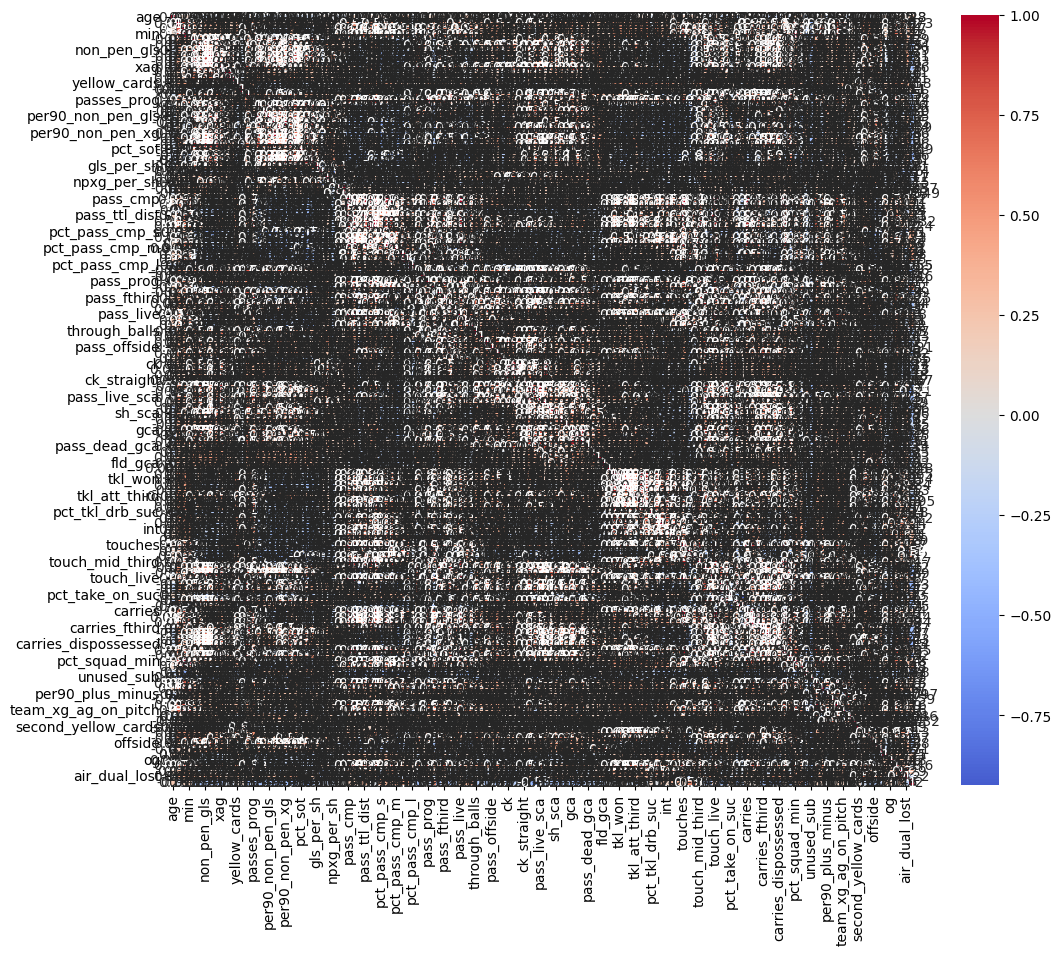

In [52]:
corr = data_final.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)